## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


**Loading the data**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


**train dataset contains 60k images each of 28x28 dimension**

In [4]:
X_train[0].shape

(28, 28)

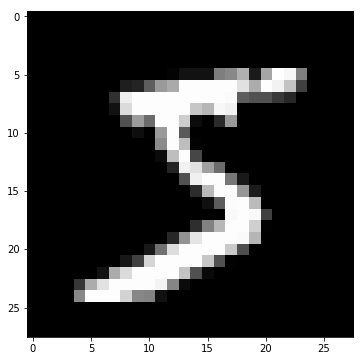

In [5]:
plt.figure(figsize=(8,6))
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [6]:
y_train[0]

5

**Preprocessing the image data**

In [7]:
img_height, img_width = 28,28

In [8]:
X_train = X_train.reshape(60000,img_height*img_width)

In [9]:
X_test = X_test.reshape(10000,img_height*img_width)

In [10]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [11]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

**We see that the values in above range from 0 to 255. We need to rescale these values between 0-1. To do that we
need to divide each value with 255. Before doing that we need to convert the data type of each value to float.**

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

**We want the last layer as such we can send the output to 1 out of 10 bins, each bin representing a digit. Lets use the to_categorical method to reshape the y_train and y_test.**

In [15]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


**Model creation**

In [16]:
model = Sequential()

In [17]:
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


**Compiling the model**

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


**The number of parameters for first hidden layer = 784 * 512 + 512(bias) = 401920. For the second hidden layer, 512 * 512 + 512 = 262656. For the third layer, 512 * 10 + 10 = 5130**

**Training the model**

In [20]:
model_trained = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 444us/step - loss: 0.1820 - acc: 0.9455 - val_loss: 0.0865 - val_acc: 0.9728
Epoch 2/20
60000/60000 [==============================] - 25s 409us/step - loss: 0.0790 - acc: 0.9745 - val_loss: 0.0929 - val_acc: 0.9708
Epoch 3/20
60000/60000 [==============================] - 25s 413us/step - loss: 0.0530 - acc: 0.9825 - val_loss: 0.0712 - val_acc: 0.9783
Epoch 4/20
60000/60000 [==============================] - 28s 464us/step - loss: 0.0438 - acc: 0.9863 - val_loss: 0.0811 - val_acc: 0.9778
Epoch 5/20
60000/60000 [==============================] - 23s 381us/step - loss: 0.0341 - acc: 0.9896 - val_loss: 0.0734 - val_acc: 0.9808
Epoch 6/20
60000/60000 [==============================] - 26s 428us/step - loss: 0.0303 - acc: 0.9904 - val_loss: 0.0757 - val_acc: 0.9791
Epoch 7/20
60000/60000 [==============================] - 24s 396us/

**Plotting the accuracy of the model**

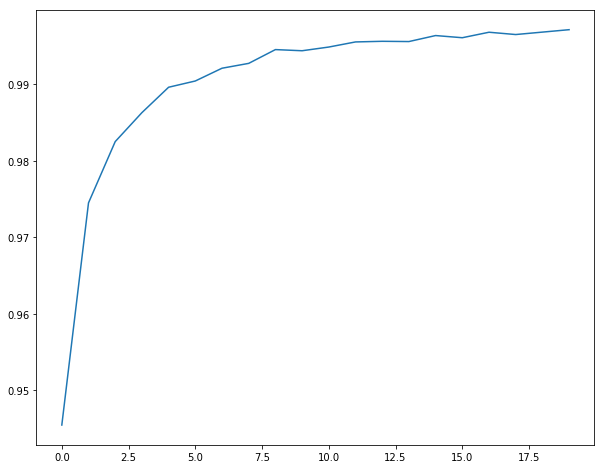

In [21]:
plt.figure(figsize=(10,8))
plt.plot(model_trained.history['acc'])
plt.show()

**Comparing the training and validation accuracy**

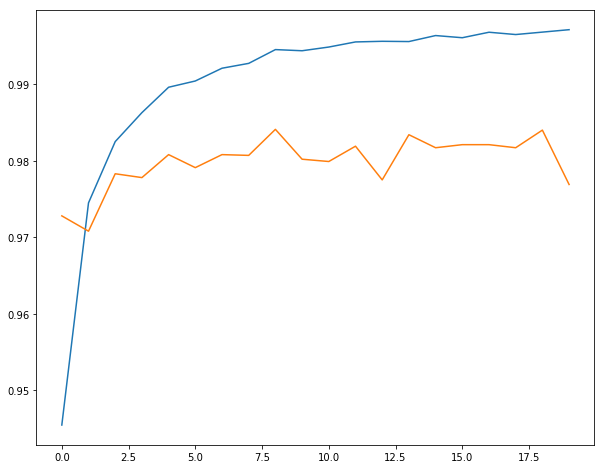

In [22]:
plt.figure(figsize=(10,8))
plt.plot(model_trained.history['acc'])
plt.plot(model_trained.history['val_acc'])
plt.show()

**Adding loss to the graph**

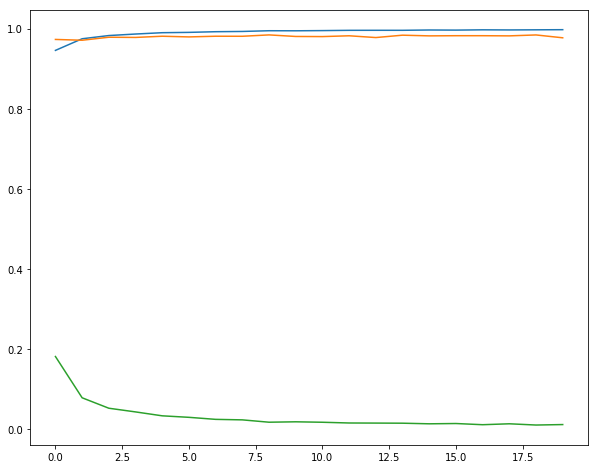

In [23]:
plt.figure(figsize=(10,8))
plt.plot(model_trained.history['acc'])
plt.plot(model_trained.history['val_acc'])
plt.plot(model_trained.history['loss'])
plt.show()

**Evalutating the model**

In [24]:
score  = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 71us/step


In [25]:
score

[0.16197133207098086, 0.9769]

## Using Convolution Neural Network(CNN) ##

In [27]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

**Preparing the data**

In [39]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [41]:
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


**Creating the model**

In [43]:
cnn = Sequential()

In [44]:
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1),padding='same',activation='relu'))

In [45]:
cnn.add(MaxPooling2D())

In [46]:
cnn.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))

In [47]:
cnn.add(MaxPooling2D())

In [48]:
cnn.add(Flatten())

In [49]:
cnn.add(Dense(1024, activation='relu'))

In [50]:
cnn.add(Dense(10,activation='softmax'))

**Compiling the model**

In [51]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total para

**Training the model**

In [53]:
cnn_trained = cnn.fit(X_train, y_train,epochs=5,verbose=1,validation_data=(X_test,y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0945 - acc: 0.9705 - val_loss: 0.0361 - val_acc: 0.9898
Epoch 2/5
60000/60000 [==============================] - 155s 3ms/step - loss: 0.0354 - acc: 0.9893 - val_loss: 0.0500 - val_acc: 0.9829
Epoch 3/5
60000/60000 [==============================] - 155s 3ms/step - loss: 0.0235 - acc: 0.9926 - val_loss: 0.0329 - val_acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0180 - acc: 0.9942 - val_loss: 0.0340 - val_acc: 0.9894
Epoch 5/5
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0136 - acc: 0.9960 - val_loss: 0.0416 - val_acc: 0.9891


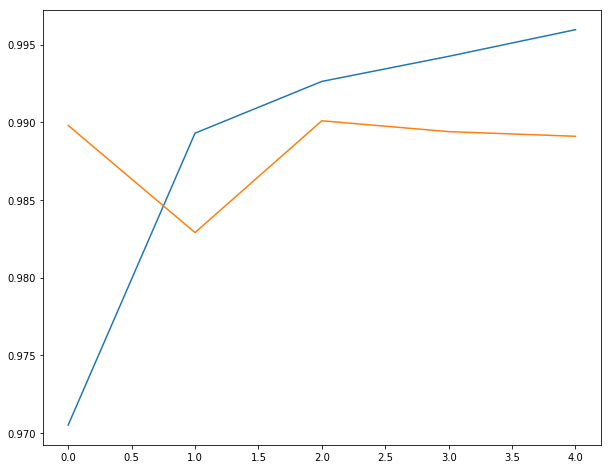

In [56]:
plt.figure(figsize=(10,8))
plt.plot(cnn_trained.history['acc'])
plt.plot(cnn_trained.history['val_acc'])
plt.show()

In [60]:
score_cnn = cnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 4s 446us/step


In [61]:
score_cnn

[0.041579272837013286, 0.9891]